In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import statsmodels.graphics.gofplots as sm
import math
import collections
from scipy.stats import chi2

In [2]:
# import dataset from nCoV2019-master/latest_data on April 13, 2020
# renamed latestdata.csv as covid_data_apr_13.csv
ds = pd.read_csv("covid_data_apr_13.csv")
df = pd.read_csv("china-cities-w-districts.csv")
dn = pd.read_csv("latestdata_5-3-2020.csv")
print(ds['country'].value_counts())
print(dn['country'].value_counts())



/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


United States                       117979
China                                42299
United Kingdom                       17814
Spain                                16157
France                               10104
South Korea                           7082
Iran                                  7026
Germany                               6516
Austria                               4240
Brazil                                4121
Netherlands                           4049
Belgium                               3746
Chile                                 2717
Mexico                                2103
Portugal                              2062
Egypt                                 1867
Japan                                 1778
Canada                                1709
Philippines                           1512
Ecuador                               1492
South Africa                          1348
Algeria                               1265
Argentina                             1137
Switzerland

In [3]:
def get_first_digit(x):
    while x >= 10:
        x /= 10
    return int(x)
def get_sec_digit(x):
    while x >= 100:
        x /= 10
    return int(x%10)
def get_first_two_digits(x):
    while x >= 100:
        x /= 10
    return int(x)

In [4]:
# chinese data
china = ds[ds.country.eq("China")]

# chinese city counts
china_city_counts = np.array(china['city'].value_counts())
china_city_greater10 = china_city_counts[china_city_counts >= 10]

# chinese province counts
china_prov_counts = np.array(china['province'].value_counts())
china_prov_greater10 = china_prov_counts[china_prov_counts >= 10]

# new chinese data from other data set
new_china_counts = df["China"]
new_china_counts_greater10 = new_china_counts[new_china_counts >= 10]

In [5]:
# extracting first, second, and first two digits from chinese city counts
china_city_first = [get_first_digit(x) for x in china_city_counts]
china_city_second = [get_sec_digit(x) for x in china_city_greater10]
china_city_firsttwo = [get_first_two_digits(x) for x in china_city_greater10]

# extracting first, second, and first two digits from chinese province counts
china_prov_first = [get_first_digit(x) for x in china_prov_counts]
china_prov_second = [get_sec_digit(x) for x in china_prov_greater10]
china_prov_firsttwo = [get_first_two_digits(x) for x in china_prov_greater10]

# extracting first, second and first two digits from new chinese city counts (other data set)
new_china_city_first = [get_first_digit(x) for x in new_china_counts]
new_china_city_second = [get_sec_digit(x) for x in new_china_counts_greater10]
new_china_city_firsttwo = [get_first_two_digits(x) for x in new_china_counts_greater10]

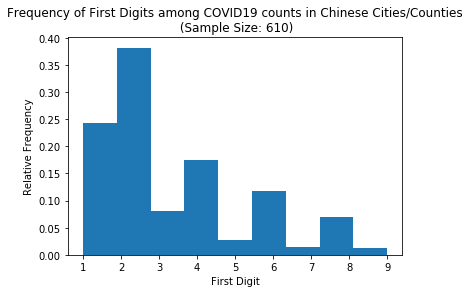

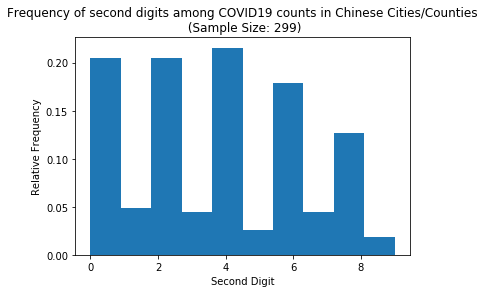

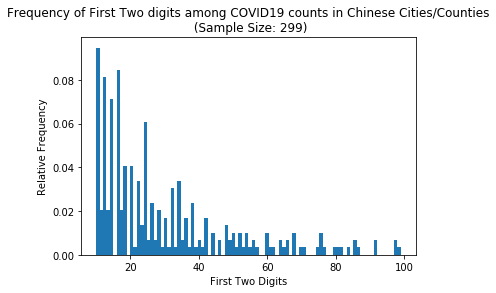

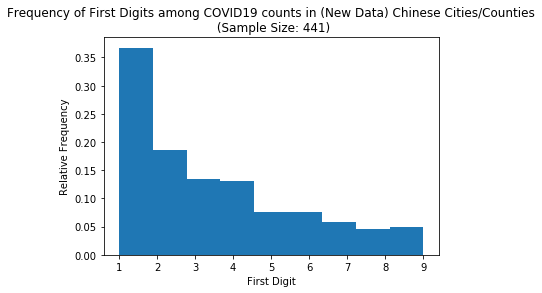

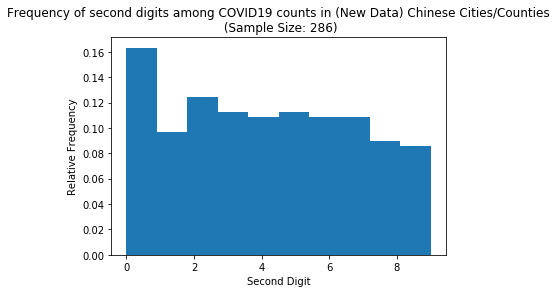

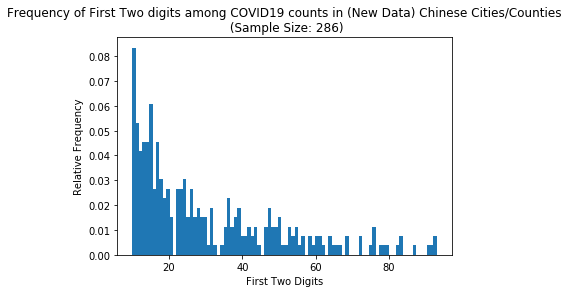

In [6]:
# chinese cities: histograms
# first digit
plt.hist(china_city_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(china_city_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(china_city_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(china_city_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()


# new data
# chinese cities: histograms
# first digit
plt.hist(new_china_city_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in (New Data) Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(new_china_city_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(new_china_city_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in (New Data) Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(new_china_city_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(new_china_city_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in (New Data) Chinese Cities/Counties"+"\n (Sample Size: " 
          + str(len(new_china_city_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

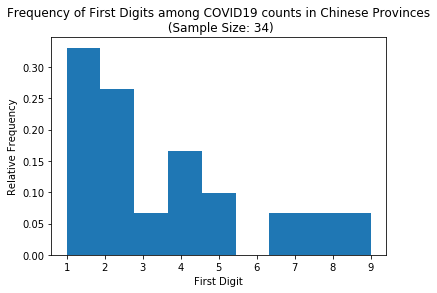

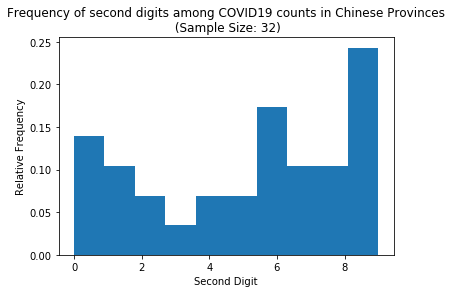

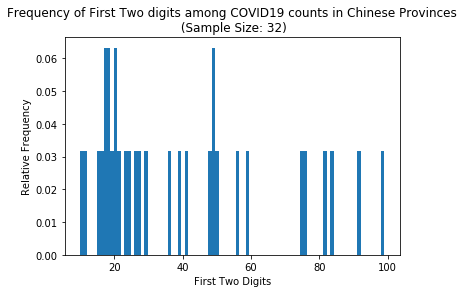

In [7]:
# chinese provinces: histograms

# first digit
plt.hist(china_prov_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(china_prov_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(china_prov_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in Chinese Provinces"+"\n (Sample Size: " 
          + str(len(china_prov_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

In [8]:
# us data
us = ds[ds.country.eq("United States")]
usn = dn[dn.country.eq("United States")]

# us city counts
us_city_counts = np.array(us['city'].value_counts())
us_city_greater10 = us_city_counts[us_city_counts >= 10]

# us province counts
us_prov_counts = np.array(us['province'].value_counts())
us_prov_greater10 = us_prov_counts[us_prov_counts >= 10]

# may us city counts
usn_city_counts = np.array(usn['city'].value_counts())
usn_city_greater10 = usn_city_counts[usn_city_counts >= 10]

In [9]:
# extracting first, second, and first two digits from us city counts
us_city_first = [get_first_digit(x) for x in us_city_counts]
us_city_second = [get_sec_digit(x) for x in us_city_greater10]
us_city_firsttwo = [get_first_two_digits(x) for x in us_city_greater10]

# extracting first, second, and first two digits from us province counts
us_prov_first = [get_first_digit(x) for x in us_prov_counts]
us_prov_second = [get_sec_digit(x) for x in us_prov_greater10]
us_prov_firsttwo = [get_first_two_digits(x) for x in us_prov_greater10]

# extracting first, second, and first two digits from may us city counts
usn_city_first = [get_first_digit(x) for x in usn_city_counts]
usn_city_second = [get_sec_digit(x) for x in usn_city_greater10]
usn_city_firsttwo = [get_first_two_digits(x) for x in usn_city_greater10]

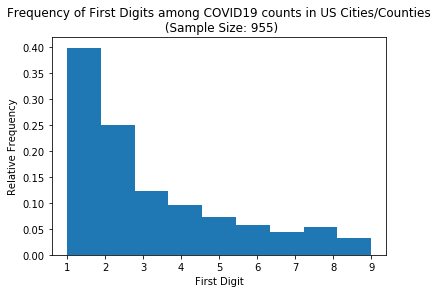

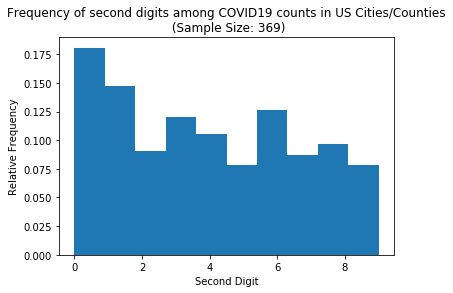

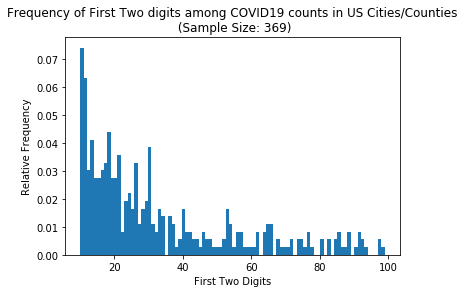

In [10]:
# us cities: histograms

# first digit
plt.hist(us_city_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(us_city_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(us_city_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in US Cities/Counties"+"\n (Sample Size: " 
          + str(len(us_city_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

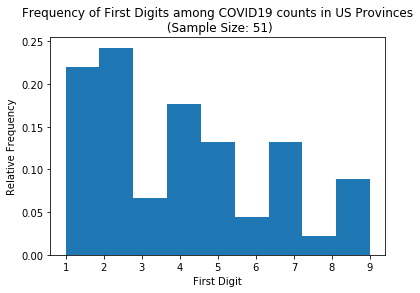

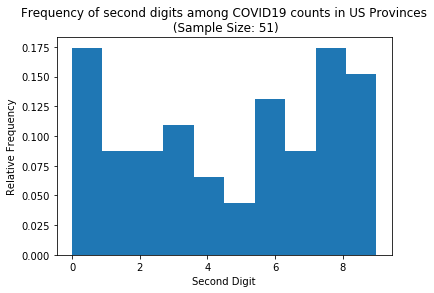

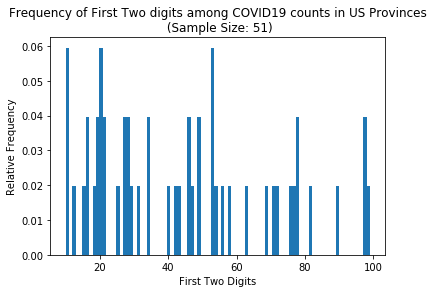

In [11]:
# us provinces: histograms

# first digit
plt.hist(us_prov_first, bins=9,density=True)
plt.title("Frequency of First Digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_first))+")")
plt.xlabel("First Digit")
plt.ylabel("Relative Frequency")
plt.show()

# second digit
plt.hist(us_prov_second, bins=10,density=True)
plt.title("Frequency of second digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_second))+")")
plt.xlabel("Second Digit")
plt.ylabel("Relative Frequency")
plt.show()

# first two digits
plt.hist(us_prov_firsttwo, bins=90,density=True)
plt.title("Frequency of First Two digits among COVID19 counts in US Provinces"+"\n (Sample Size: " 
          + str(len(us_prov_firsttwo))+")")
plt.xlabel("First Two Digits")
plt.ylabel("Relative Frequency")
plt.show()

In [12]:
# may april data
italyN = dn[dn.country.eq("Italy")]

italyN_city_counts = np.array(italyN['city'].value_counts())
italyN_city_greater10 = italyN_city_counts[italyN_city_counts >= 10]

# extracting first, second, and first two digits from may us city counts
italyN_city_first = [get_first_digit(x) for x in italyN_city_counts]
italyN_city_second = [get_sec_digit(x) for x in italyN_city_greater10]
italyN_city_firsttwo = [get_first_two_digits(x) for x in italyN_city_greater10]

In [13]:
# get frequencies for 1st digit and 1st 2 digits Benford's law distribution
def get_benford_pdf(lst):
    probs = []
    for d in lst:
        probs.append(math.log(1+1/d,10))
    return probs

# get frequencies for 2nd digit Benford's law distribution
def get_second_digit_benford_pdf(lst):
    probs = []
    for element in lst:
        d = element % 10
        sum_prob = 0
        
        # probability that d is the nth digit is
        # sum_{k = 10^{n-2}}^{10^{n-1} - 1} log_10(1 + 1/(10k + d))
        # (ex.) 0th digit dist is log(1 + 1/10) + ... + log (1 + 1/90)
        for k in range(1, 10):
            denom = 10*k + d
            sum_prob += math.log(1+1/denom, 10)
            
        probs.append(sum_prob)
    return probs     

In [14]:
first_digits = np.arange(1,10)
first_dig_pdf = get_benford_pdf(first_digits)
first_dig_cdf = np.cumsum(first_dig_pdf)

second_digits = np.arange(10)
second_dig_pdf = get_second_digit_benford_pdf(second_digits)
second_dig_cdf = np.cumsum(second_dig_pdf)

first_two_digits = np.arange(10,100)
first_two_dig_pdf = get_benford_pdf(first_two_digits)
first_two_dig_cdf = np.cumsum(first_two_dig_pdf)

In [15]:
# TESTS
def sig_stat(statistic, critical_val):
    if statistic > critical_val:
        return("SIGNIFICANT")
    else:
        return("")
# Chi-squared test
def chi_squared_test(degrees_freedom, empirical_count, expected_count):
    crit_val5 = chi2.ppf(0.95, degrees_freedom)
    crit_val1 = chi2.ppf(0.99, degrees_freedom)

    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(empirical_count, expected_count):
        chi_square = math.pow(data - expected, 2)
        chi_square_stat += chi_square / expected

    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is {:.3f}. ".format(crit_val5) 
          + sig_stat(chi_square_stat, crit_val5))  
    print("Critical value at a P-value of 0.01 is {:.3f}. ".format(crit_val1) 
          + sig_stat(chi_square_stat, crit_val1))  

# Kolmogorov-Smirnoff test    
def ks_test(sample_size, ecdf, expected_cdf):
    ks_stat = np.max(np.abs(np.subtract(ecdf, expected_cdf)))
    ks_crit_val5 = 1.36/(sample_size**0.5)
    ks_crit_val1 = 1.63/(sample_size**0.5)
    print("\nKS Test Statistic = {:.3f}".format(ks_stat))
    print("Critical value at a P-value of 0.05 is {:.3f}. ".format(ks_crit_val5) + sig_stat(ks_stat, ks_crit_val5))  
    print("Critical value at a P-value of 0.01 is {:.3f}. ".format(ks_crit_val1) + sig_stat(ks_stat, ks_crit_val1))
    
# Cramer von Mises tests    
def cvm_tests(sample_size, ecdf, cdf, epdf, pdf): 
    p = pdf + [pdf[0]]
    
    # weights
    t = []
    for i in range(len(pdf)):
        t.append((p[i]+p[i+1])/2)
        
    Z = np.subtract(ecdf, cdf)
    Z_bar = np.sum(np.multiply(Z,t))
    
    # W_d^2 = n \sum Z_i^2t_i
    cvm_vals = np.multiply(np.power(Z,2),t)
    cvm_stat = sample_size * np.sum(cvm_vals)
    print("\nCramer von Mises Statistic = {:.3f}".format(cvm_stat))
    print("Critical value at a P-value of 0.05 is 0.471. " + sig_stat(cvm_stat, 0.471))  
    print("Critical value at a P-value of 0.01 is 0.768. " + sig_stat(cvm_stat, 0.768))  
    
    # U_d^2 = n \sum (Z_i - Z_bar)^2 t_i
    watson_vals = np.multiply(np.power(np.subtract(Z,Z_bar),2),t)
    watson_stat = sample_size * np.sum(watson_vals)
    print("\nWatson Statistic = {:.3f}".format(watson_stat))
    print("Critical value at a P-value of 0.05 is 0.205. " + sig_stat(watson_stat, 0.205))
    print("Critical value at a P-value of 0.01 is 0.304. " + sig_stat(watson_stat, 0.304))
    
    # A_d^2 = n \sum Z_i^2 t_i/(T_i(1-T_i))
    ad_vals = np.divide(np.multiply(np.power(Z,2),t),np.multiply(pdf,np.subtract(1, pdf)))
    ad_stat = sample_size * np.sum(ad_vals)
    print("\nAnderson-Darling Statistic = {:.3f}".format(ad_stat))
    print("Critical value at a P-value of 0.05 is 2.304. " + sig_stat(ad_stat, 2.304))
    print("Critical value at a P-value of 0.01 is 3.688. " + sig_stat(ad_stat, 3.688))

    
# def kuiper_test(ecdf, cdf):
#     Dplus = np.max(np.subtract(cdf, ecdf))
#     Dminus = np.max(np.subtract(ecdf, cdf))
#     k_stat = Dplus + Dminus
#     print("Kuiper Test Statistic = {:.3f}".format(k_stat))
#     print("Critical value at a P-value of 0.05 is 1.321") 
    
    
def stat_tests(data, start_digit, end_digit, exp_pdf):
    # law type = 0 if single digit BL, 1 if two digits BL
    test = ""
    
    number_digits = end_digit - start_digit + 1
    if number_digits == 9:
        test = "First"
    elif number_digits == 10:
        test = "Second"
    elif number_digits == 90:
        test = "First Two"
    
    digits = np.arange(start_digit, end_digit + 1)
    # get pdf and cdf of data
    data.sort()
    counter = collections.Counter(data)
    sample_size = len(data) 

    # tallying frequency of (first/second/first two) digits in data
    data_count = np.zeros(len(exp_pdf))
    for i in counter:
        data_count[i-start_digit] = counter[i]
        
    data_pdf = np.divide(data_count, sample_size)
    data_cdf = np.cumsum(data_pdf)
    exp_cdf = np.cumsum(exp_pdf)
    exp_count = [round(p * sample_size) for p in exp_pdf]
    
    # plot data with expected distribution
    plt.plot(digits,exp_pdf,marker=".")
    plt.bar(digits,data_pdf,color='0.75')
    plt.xlabel("Digit")
    plt.ylabel("Relative Frequency")
    plt.title("Empirical Distribution of " + test + " digits \nOverlayed with Benford's Law Distribution (Sample Size " + str(len(data)) +")")
    plt.show()

    # degrees of freedom: end_digit - start_digit + 1 - 1 (k categories -> chi_{k-1}^2)
    chi_squared_test(number_digits - 1, data_count, exp_count)

    ks_test(sample_size, data_cdf, exp_cdf)
    cvm_tests(sample_size, data_cdf, exp_cdf, data_pdf, exp_pdf)

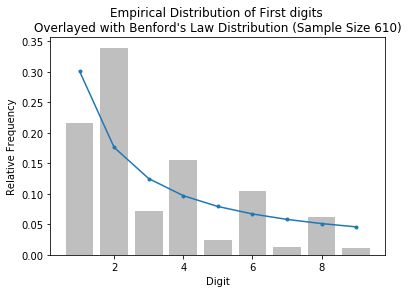


Chi-squared Test Statistic = 217.343
Critical value at a P-value of 0.05 is 15.507. SIGNIFICANT
Critical value at a P-value of 0.01 is 20.090. SIGNIFICANT

KS Test Statistic = 0.085
Critical value at a P-value of 0.05 is 0.055. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.066. SIGNIFICANT

Cramer von Mises Statistic = 2.309
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 2.231
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 18.090
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


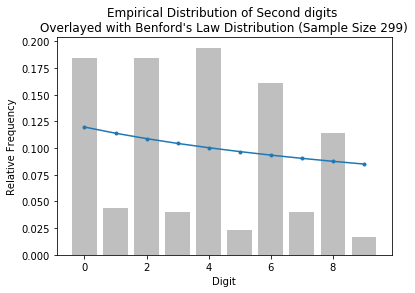


Chi-squared Test Statistic = 133.214
Critical value at a P-value of 0.05 is 16.919. SIGNIFICANT
Critical value at a P-value of 0.01 is 21.666. SIGNIFICANT

KS Test Statistic = 0.098
Critical value at a P-value of 0.05 is 0.079. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.094. SIGNIFICANT

Cramer von Mises Statistic = 1.003
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.401
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 11.169
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


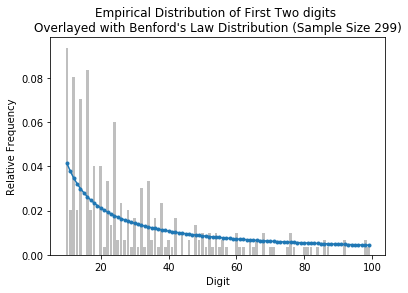


Chi-squared Test Statistic = 257.879
Critical value at a P-value of 0.05 is 112.022. SIGNIFICANT
Critical value at a P-value of 0.01 is 122.942. SIGNIFICANT

KS Test Statistic = 0.185
Critical value at a P-value of 0.05 is 0.079. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.094. SIGNIFICANT

Cramer von Mises Statistic = 4.699
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.811
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 379.203
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


In [16]:
# evaluating benford's law for chinese cities (first/second/first two digits)
stat_tests(china_city_first, 1, 9, first_dig_pdf)
stat_tests(china_city_second, 0, 9, second_dig_pdf)
stat_tests(china_city_firsttwo, 10, 99, first_two_dig_pdf)

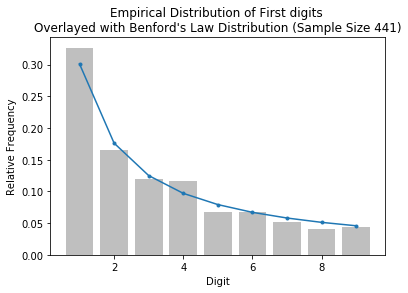


Chi-squared Test Statistic = 4.989
Critical value at a P-value of 0.05 is 15.507. 
Critical value at a P-value of 0.01 is 20.090. 

KS Test Statistic = 0.029
Critical value at a P-value of 0.05 is 0.065. 
Critical value at a P-value of 0.01 is 0.078. 

Cramer von Mises Statistic = 0.145
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.041
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 1.219
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


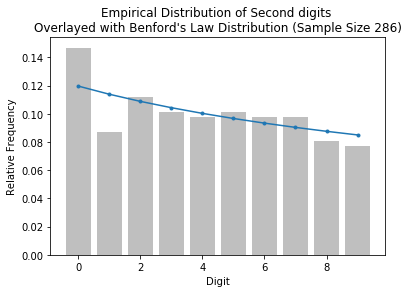


Chi-squared Test Statistic = 4.475
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.027
Critical value at a P-value of 0.05 is 0.080. 
Critical value at a P-value of 0.01 is 0.096. 

Cramer von Mises Statistic = 0.035
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.022
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 0.353
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


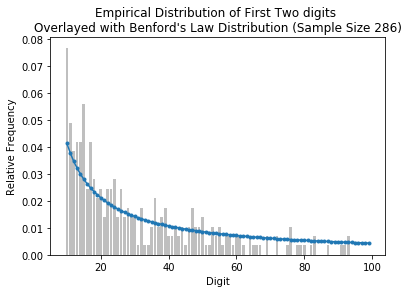


Chi-squared Test Statistic = 83.474
Critical value at a P-value of 0.05 is 112.022. 
Critical value at a P-value of 0.01 is 122.942. 

KS Test Statistic = 0.142
Critical value at a P-value of 0.05 is 0.080. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.096. SIGNIFICANT

Cramer von Mises Statistic = 3.136
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.435
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 266.719
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


In [17]:
stat_tests(new_china_city_first, 1, 9, first_dig_pdf)
stat_tests(new_china_city_second, 0, 9, second_dig_pdf)
stat_tests(new_china_city_firsttwo, 10, 99, first_two_dig_pdf)

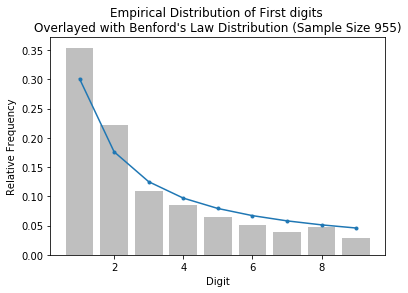


Chi-squared Test Statistic = 42.640
Critical value at a P-value of 0.05 is 15.507. SIGNIFICANT
Critical value at a P-value of 0.01 is 20.090. SIGNIFICANT

KS Test Statistic = 0.099
Critical value at a P-value of 0.05 is 0.044. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.053. SIGNIFICANT

Cramer von Mises Statistic = 3.536
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 1.013
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 29.342
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


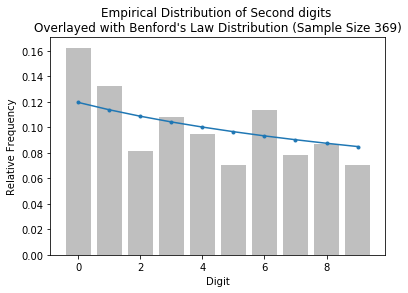


Chi-squared Test Statistic = 15.650
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.062
Critical value at a P-value of 0.05 is 0.071. 
Critical value at a P-value of 0.01 is 0.085. 

Cramer von Mises Statistic = 0.419
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.120
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 4.310
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


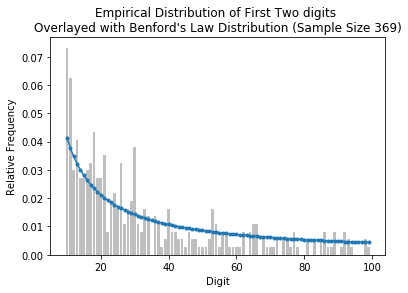


Chi-squared Test Statistic = 120.267
Critical value at a P-value of 0.05 is 112.022. SIGNIFICANT
Critical value at a P-value of 0.01 is 122.942. 

KS Test Statistic = 0.145
Critical value at a P-value of 0.05 is 0.071. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.085. SIGNIFICANT

Cramer von Mises Statistic = 2.711
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.537
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 211.820
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


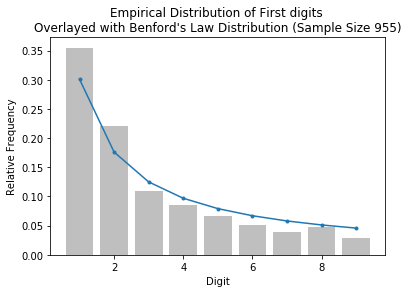


Chi-squared Test Statistic = 42.876
Critical value at a P-value of 0.05 is 15.507. SIGNIFICANT
Critical value at a P-value of 0.01 is 20.090. SIGNIFICANT

KS Test Statistic = 0.099
Critical value at a P-value of 0.05 is 0.044. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.053. SIGNIFICANT

Cramer von Mises Statistic = 3.579
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 1.006
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 29.733
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


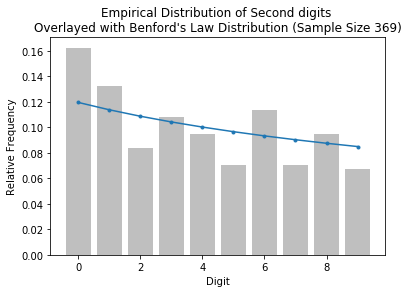


Chi-squared Test Statistic = 16.811
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.062
Critical value at a P-value of 0.05 is 0.071. 
Critical value at a P-value of 0.01 is 0.085. 

Cramer von Mises Statistic = 0.446
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.124
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 4.609
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


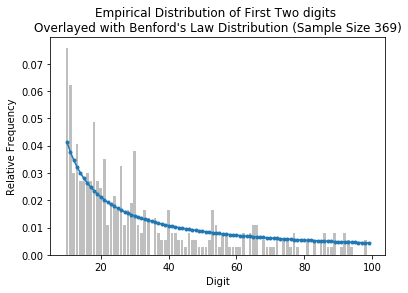


Chi-squared Test Statistic = 123.725
Critical value at a P-value of 0.05 is 112.022. SIGNIFICANT
Critical value at a P-value of 0.01 is 122.942. SIGNIFICANT

KS Test Statistic = 0.148
Critical value at a P-value of 0.05 is 0.071. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.085. SIGNIFICANT

Cramer von Mises Statistic = 2.849
Critical value at a P-value of 0.05 is 0.471. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.768. SIGNIFICANT

Watson Statistic = 0.538
Critical value at a P-value of 0.05 is 0.205. SIGNIFICANT
Critical value at a P-value of 0.01 is 0.304. SIGNIFICANT

Anderson-Darling Statistic = 223.474
Critical value at a P-value of 0.05 is 2.304. SIGNIFICANT
Critical value at a P-value of 0.01 is 3.688. SIGNIFICANT


In [18]:
# evaluating benford's law for us cities (first/second/first two digits)
stat_tests(us_city_first, 1, 9, first_dig_pdf)
stat_tests(us_city_second, 0, 9, second_dig_pdf)
stat_tests(us_city_firsttwo, 10, 99, first_two_dig_pdf)

# evaluating benford's law for (may) us cities (first/second/first two digits)
stat_tests(usn_city_first, 1, 9, first_dig_pdf)
stat_tests(usn_city_second, 0, 9, second_dig_pdf)
stat_tests(usn_city_firsttwo, 10, 99, first_two_dig_pdf)

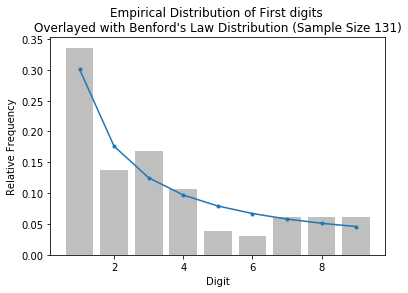


Chi-squared Test Statistic = 10.142
Critical value at a P-value of 0.05 is 15.507. 
Critical value at a P-value of 0.01 is 20.090. 

KS Test Statistic = 0.049
Critical value at a P-value of 0.05 is 0.119. 
Critical value at a P-value of 0.01 is 0.142. 

Cramer von Mises Statistic = 0.102
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.079
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 0.932
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


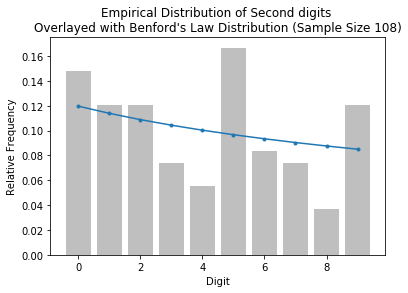


Chi-squared Test Statistic = 15.405
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.046
Critical value at a P-value of 0.05 is 0.131. 
Critical value at a P-value of 0.01 is 0.157. 

Cramer von Mises Statistic = 0.103
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.075
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 1.117
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


In [19]:
# evaluating benford's law for (may) us cities (first/second/first two digits)
stat_tests(italyN_city_first, 1, 9, first_dig_pdf)
stat_tests(italyN_city_second, 0, 9, second_dig_pdf)
# stat_tests(italyN_city_firsttwo, 10, 99, first_two_dig_pdf)


In [39]:
def generate_from_benford(samples_array, digits, cdf):
    for i in range(num_samples):
        unif = float(np.random.uniform(0, 1, 1))
#         print("\n")
#         print(unif)
#         print("i:" + str(i))
        for j in range(len(digits)):
            if cdf[j] < unif < cdf[j+1]:
                samples_array[i] = digits[j]
#                 print("bound: " + str(cdf[j+1]))
#                 print("digit: " + str(digits[j]))
                break
    return samples_array


num_samples = 300

samples1 = np.zeros(num_samples)
digits1 = np.arange(1, 10)
cdf1 = np.append(0, first_dig_cdf)
samples1 = generate_from_benford(samples1, digits1, cdf1).astype(int)

samples2 = np.zeros(num_samples)
digits2 = np.arange(10)
cdf2 = np.append(0, second_dig_cdf)
samples2 = generate_from_benford(samples2, digits2, cdf2).astype(int)

print(samples1)
print(samples2)
counts = np.add(10*samples1, samples2).astype(int)
print(counts)


[ 0.          0.30103     0.47712125  0.60205999  0.69897     0.77815125
  0.84509804  0.90308999  0.95424251  1.        ]
[1 5 9 4 8 9 3 3 1 1 7 1 9 2 5 1 6 4 2 1 5 6 3 2 1 2 1 1 5 3 5 6 2 1 2 2 1
 2 3 1 3 6 3 3 7 3 1 1 2 2 7 6 2 6 7 2 1 1 1 5 2 1 2 8 5 3 1 2 3 1 2 1 5 8
 6 3 2 3 4 2 2 9 2 1 3 2 5 4 8 4 1 7 8 9 1 9 1 5 1 5 2 3 8 1 2 3 1 1 7 1 5
 6 8 3 1 7 2 2 3 1 9 1 1 3 6 9 2 4 3 1 8 6 6 4 2 1 1 4 4 1 1 6 2 1 3 4 1 1
 5 2 3 6 1 9 4 1 6 1 4 1 1 1 3 1 5 2 5 6 2 3 4 2 3 6 1 5 2 9 5 1 8 2 5 1 7
 9 3 1 1 8 1 2 1 3 5 1 1 5 9 2 7 1 6 1 2 1 3 1 9 1 2 4 5 6 1 9 8 3 1 2 2 1
 1 1 1 3 6 1 6 5 1 8 8 7 2 5 4 3 2 1 2 1 6 4 3 3 5 1 1 6 1 9 1 2 2 1 4 1 7
 3 3 6 6 1 1 1 3 4 3 5 1 5 1 2 2 1 1 2 1 1 2 1 6 3 1 3 4 1 2 5 2 5 1 1 9 5
 1 1 1 1]
[0 2 5 0 9 2 0 7 5 1 5 0 9 6 6 4 5 2 1 6 8 3 3 4 2 0 8 9 6 9 3 1 4 2 1 3 1
 8 9 7 3 4 3 0 8 9 0 0 4 8 1 9 5 3 1 1 5 6 3 8 4 7 0 2 2 6 8 6 5 1 4 3 2 5
 8 9 3 3 9 7 7 3 1 6 8 0 8 5 2 5 3 8 3 9 3 0 6 7 4 2 1 3 2 2 3 4 2 9 8 9 3
 3 4 7 6 1 1 6 4 2 7 6 2 5 5 1 0 7 7 7 8 0

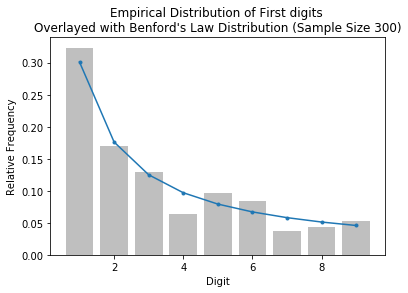


Chi-squared Test Statistic = 9.138
Critical value at a P-value of 0.05 is 15.507. 
Critical value at a P-value of 0.01 is 20.090. 

KS Test Statistic = 0.022
Critical value at a P-value of 0.05 is 0.079. 
Critical value at a P-value of 0.01 is 0.094. 

Cramer von Mises Statistic = 0.077
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.044
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 0.599
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


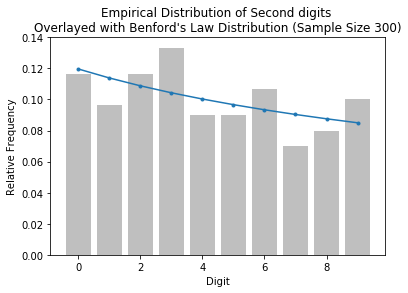


Chi-squared Test Statistic = 6.994
Critical value at a P-value of 0.05 is 16.919. 
Critical value at a P-value of 0.01 is 21.666. 

KS Test Statistic = 0.020
Critical value at a P-value of 0.05 is 0.079. 
Critical value at a P-value of 0.01 is 0.094. 

Cramer von Mises Statistic = 0.040
Critical value at a P-value of 0.05 is 0.471. 
Critical value at a P-value of 0.01 is 0.768. 

Watson Statistic = 0.039
Critical value at a P-value of 0.05 is 0.205. 
Critical value at a P-value of 0.01 is 0.304. 

Anderson-Darling Statistic = 0.438
Critical value at a P-value of 0.05 is 2.304. 
Critical value at a P-value of 0.01 is 3.688. 


In [47]:
stat_tests(samples1, 1, 9, first_dig_pdf)
stat_tests(samples2, 0, 9, second_dig_pdf)